# Case iFood


[Repositório com dados](https://github.com/Victor-cb/case_ifood_aulas.git)

## Objetivos


* Colocar em prática os conhecimentos adquiridos até aqui

* Permitir que cada um avalie sua própria performance detalhadamente

* Introduzir a experiência de case interview em Data Science, método comum em processos seletivos (material baseado em um processo seletivo real)


## Dinâmica

* O case será realizado em duas fases: 
  * (I) entendimento do problema e planejamento;
* (II) Execução 
  * Fase I - Entendimento do Problema e Planejamento (Máximo de 25 min)
  *  Baixar os arquivos na pasta da aula ou repositório
     *  pdf: contém a descrição (em inglês) do case, seus objetivos e informações sobre os dados
     *  csv: base de dados de referência para a realização do case

* Construir um roteiro de análise (planejamento) para solução do problema, individualmente. O roteiro deve ser no formato de 
* Tarefa: Descrição da tarefa
* Sub-tarefa1: Descrição/Justificativa
* Sub-tarefa2: Descrição/Justificativa
* Fase II - Execução (1h:40min)
* Cada aluno terá até 1h:40min para desenvolver a solução do case individualmente
* Ao final do tempo (aprox. às 21h:15min), deverá  anexar sua solução no drive




### Dicas

- Fase I
- Garanta que entendeu o problema, faça uma definição simples e objetiva
- Procure organizar as atividades que irá realizar.

- Fase II
- Comece entendendo o dataset: do que se tratam os dados? Qual a unidade de análise?
- Entenda melhor as features disponíveis
- Verifique se as informações são consistentes
- Que tipo de informação podemos derivar dos dados disponíveis?
- Quais tratamentos podemos realizar?
- Como comunicar nossos achados (storytelling)?


## Entrega

In [1]:
# Dependências
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
pd.options.display.max_columns=500

In [2]:
# Merge das bases de dados
df_people = pd.read_csv('ifood_people.csv',header=0,sep=",")
df_pc = pd.read_csv('ifood_previous_campaing.csv',header=0,sep=",")
df_pp = pd.read_csv('ifood_purchase_profile.csv',header=0,sep=",")
df1 = pd.merge(df_people, df_pc, on='ID')
df = pd.merge(df1, df_pp, on='ID')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,0,0,0,0,0,0,3,11,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,0,0,0,0,0,0,3,11,0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,0,0,0,0,0,0,3,11,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,0,0,0,0,0,0,3,11,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,0,0,0,0,0,0,3,11,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5


In [3]:
# Tratamento de valores
df['Income'].replace(np.nan, '0', inplace=True)
df['Income'] = df['Income'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   AcceptedCmp3         2240 non-null   int64  
 8   AcceptedCmp4         2240 non-null   int64  
 9   AcceptedCmp5         2240 non-null   int64  
 10  AcceptedCmp1         2240 non-null   int64  
 11  AcceptedCmp2         2240 non-null   int64  
 12  Complain             2240 non-null   int64  
 13  Z_CostContact        2240 non-null   int64  
 14  Z_Revenue            2240 non-null   int64  
 15  Response             2240 non-null   i

C:\Users\Tonisk\AppData\Local\Temp\ipykernel_22204\3347898921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].replace(np.nan, '0', inplace=True)


### Propostas de Análise:

##### 1) Análisar comportamento de compras dos usuários baseado em estado civil, idade e renda <br> em relação ao meio de comprar, por web ou em lojas fisicas

##### 2) verificar relação que renda tem com a quantidade de compras e Formação acadêmica dos usuários

In [4]:
#tratamento de dados
df['Marital_Status'].replace('YOLO', np.nan, inplace=True)
df['Marital_Status'].replace('Absurd', np.nan, inplace=True)
df['Marital_Status'].replace('Alone', 'Single', inplace=True)

C:\Users\Tonisk\AppData\Local\Temp\ipykernel_22204\1338651691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital_Status'].replace('YOLO', np.nan, inplace=True)
C:\Users\Tonisk\AppData\Local\Temp\ipykernel_22204\1338651691.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Resumo da Análise:

1) Análisar comportamento de compras dos usuários baseado em **estado civil**, <br> em relação ao meio de comprar, por **web** ou em **lojas fisicas**:

    Não há diferença nos usuários que consomem produtos via as lojas WEB ou Físicas em relação a seus estados civis <br>
    Análise do tópico 2 pode esclarecer o motivo de casais comprarem quase que o dobro a mais que solteiros, porém <br>
    o local onde o usuário compra não é afetado. Com isso divergir uma campanha com base neste aspecto pode não  <br>
    beneficiar as vendas. 

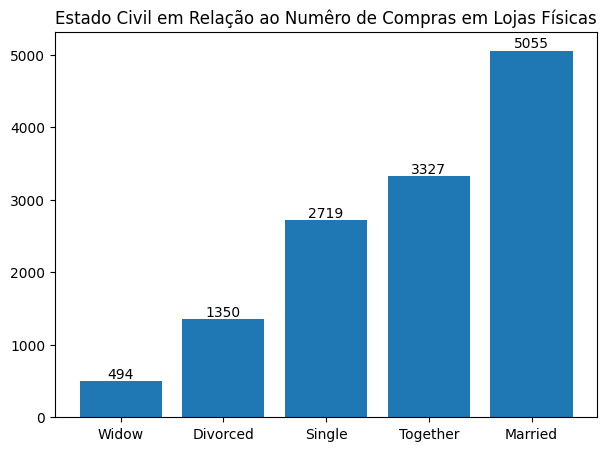

In [5]:
#Lojas Fisicas
plt.rcParams["figure.figsize"] = (7, 5)
df3 = df.groupby('Marital_Status').agg({'NumStorePurchases' : 'sum'}).sort_values('NumStorePurchases')
ax = plt.subplot()
plt.title('Estado Civil em Relação ao Numêro de Compras em Lojas Físicas')
bar = plt.bar(df3.index, df3['NumStorePurchases']);
ax.bar_label(bar, fmt=lambda x: f'{x:.0f}');

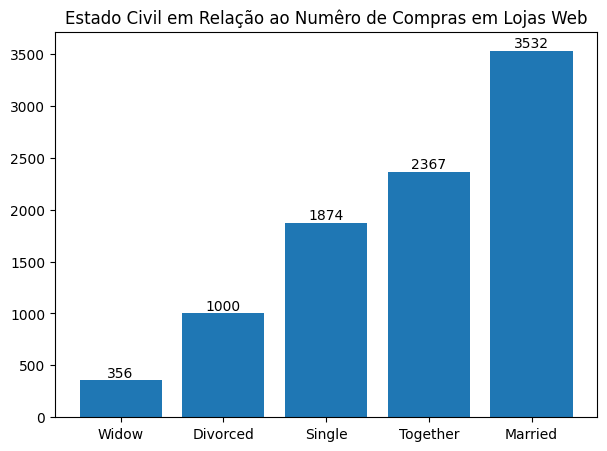

In [6]:
#Lojas Web
plt.rcParams["figure.figsize"] = (7, 5)
df3 = df.groupby('Marital_Status').agg({'NumWebPurchases' : 'sum'}).sort_values('NumWebPurchases')
ax = plt.subplot()
plt.title('Estado Civil em Relação ao Numêro de Compras em Lojas Web')
bar = plt.bar(df3.index, df3['NumWebPurchases']);
ax.bar_label(bar, fmt=lambda x: f'{x:.0f}');

2) Análisar comportamento de compras dos usuários baseado em **idade**, <br> em relação ao meio de comprar, por **web** ou em **lojas fisicas**:

    Não há diferenças significativas no comportamento de usuários de diferentes <br>
    idades em relação a preferência de onde comprar os produtos do Ifood

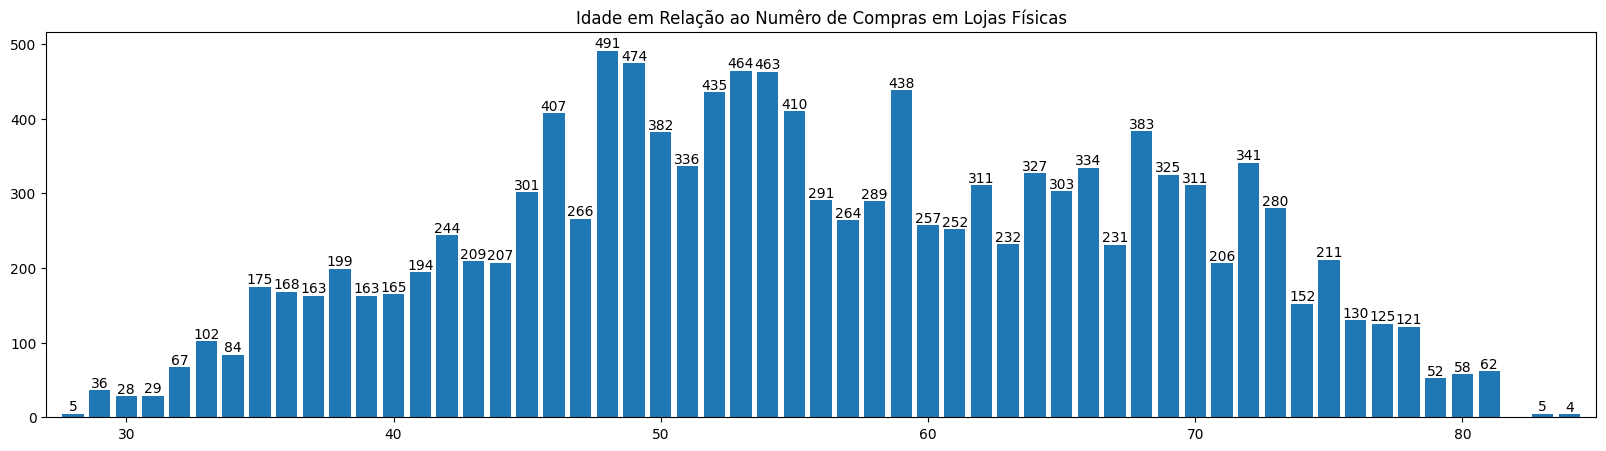

In [7]:
df['idade'] = 2024 - df['Year_Birth']
df[(df['idade'] > 100)] = np.nan

df3 = df.groupby('idade').agg({'NumStorePurchases' : 'sum'}).sort_values('NumStorePurchases')
plt.rcParams["figure.figsize"] = (20, 5)
ax = plt.subplot()
plt.title('Idade em Relação ao Numêro de Compras em Lojas Físicas')
bar = plt.bar(df3.index, df3['NumStorePurchases'], width = 0.8);
plt.xlim(df['idade'].min() - 1, df['idade'].max() + 1)
ax.bar_label(bar, fmt=lambda x: f'{x:.0f}');

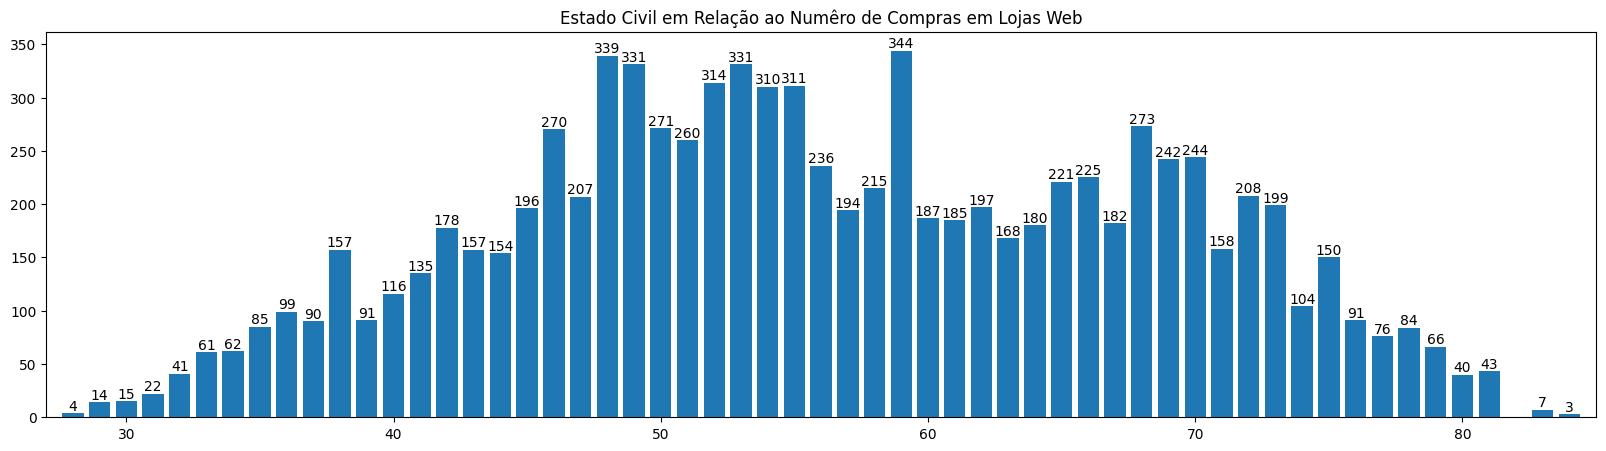

In [8]:
#Lojas Web
df3 = df.groupby('idade').agg({'NumWebPurchases' : 'sum'}).sort_values('NumWebPurchases')
ax = plt.subplot()
plt.title('Estado Civil em Relação ao Numêro de Compras em Lojas Web')
bar = plt.bar(df3.index, df3['NumWebPurchases']);
plt.xlim(df['idade'].min() - 1, df['idade'].max() + 1)
ax.bar_label(bar, fmt=lambda x: f'{x:.0f}');

3) verificar relação que o **estado civil** tem com a **quantidade de compras** e **renda** dos usuários
    
    Com tais dados podemos concluir que usuários que estão em alguma forma de relação com outra pessoa tendem <br>
    renda maior e, por consequência, comrprar mais dos produtos do Ifood.<br>
    Com isso pode se analisar uma relação maior entre renda e estado civil assim como entre renda com quantidade <br>
    de compras. o estado civil de uma pessoa não aparenta afetar diretamente o quanto ela compra. 

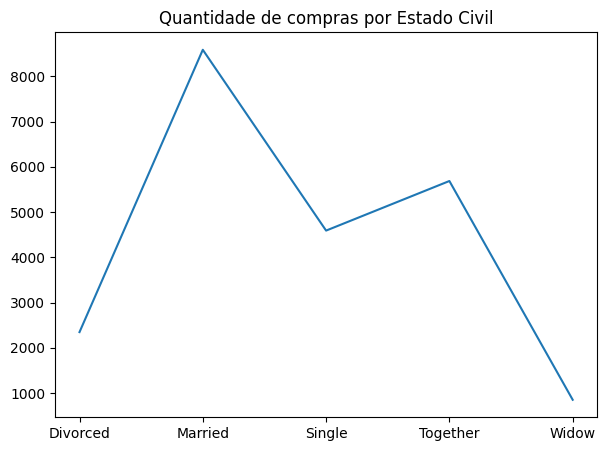

In [9]:
plt.rcParams["figure.figsize"] = (7, 5)
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumStorePurchases']
df2 = df.groupby('Marital_Status').agg({'TotalPurchases' : 'sum'})
plt.title('Quantidade de compras por Estado Civil')
plt.plot(df2);

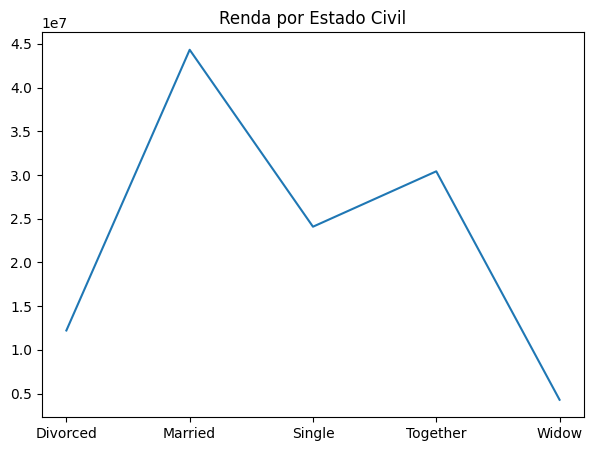

In [10]:
df2 = df.groupby('Marital_Status').agg({'Income' : 'sum'})
plt.title('Renda por Estado Civil')
plt.plot(df2);

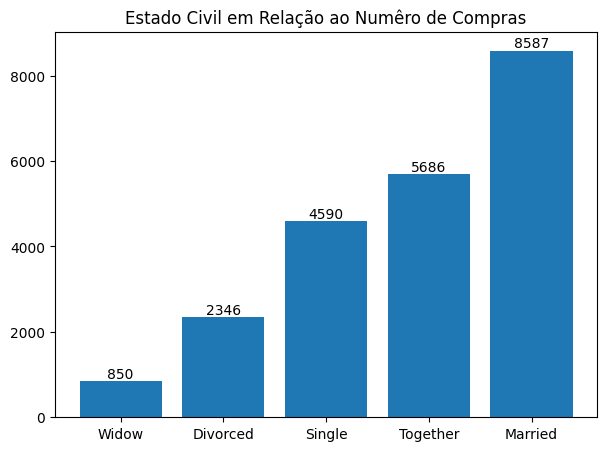

In [11]:
#Total
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumStorePurchases']
df3 = df.groupby('Marital_Status').agg({'TotalPurchases' : 'sum'}).sort_values('TotalPurchases')
ax = plt.subplot()
plt.title('Estado Civil em Relação ao Numêro de Compras')
bar = plt.bar(df3.index, df3['TotalPurchases']);
ax.bar_label(bar, fmt=lambda x: f'{x:.0f}');

3) verificar relação que **Formação acadêmica** tem com a **quantidade de compras** e **renda** dos usuários

    Supreendentemente a maior qualificação acadêmica não configura uma maior renda entre os usuários <br>
    do Ifood, e quantidade de produtos vendidos novamente aparenta estar mais relacionado com a renda dos <br>
    usuários do que especificamente sua formação acadêmica
    

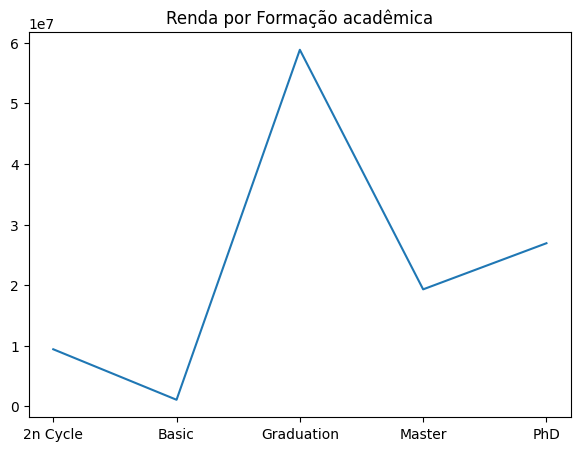

In [12]:
# Renda
df2 = df.groupby('Education').agg({'Income' : 'sum'})
plt.title('Renda por Formação acadêmica')
plt.plot(df2);

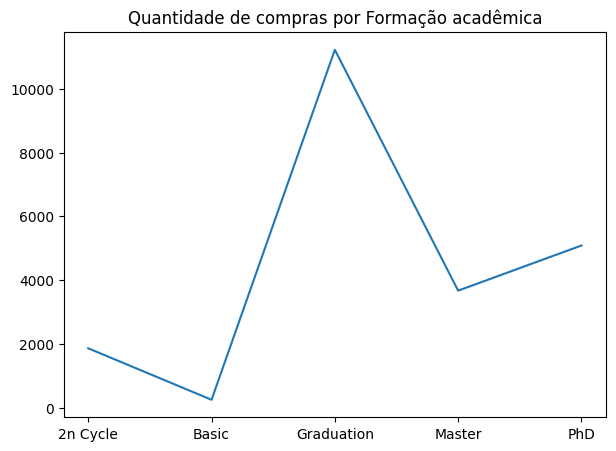

In [13]:
# Total de compras
df2 = df.groupby('Education').agg({'TotalPurchases' : 'sum'})
plt.title('Quantidade de compras por Formação acadêmica')
plt.plot(df2);

Conclusão Final:

É atraente promover campanhas de promoção focadas em usuários que não estão em uma <br>
relação e possivelmente não são formados para aumentar as vendas neste demográfico <br>

Juntamente disso, campanhas atuais direcionadas a casais devem continuar para garantir <br>
continuidade do sucesso encontrado na análise de vendas.